In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV,ElasticNet,ElasticNetCV,LinearRegression # Cv is nothing but Cross validation 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')

In [3]:
df = df.drop(columns = 'Date')

In [9]:
def remove_outliers(dataframe):
    
    cleaned_df = dataframe.copy()  # Create a copy to avoid modifying the original DataFrame
    numeric_features = cleaned_df.select_dtypes(include=['number']).columns
    
    for feature in numeric_features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = cleaned_df[feature].quantile(0.25)
        Q3 = cleaned_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        cleaned_df = cleaned_df[(cleaned_df[feature] >= lower_bound) & (cleaned_df[feature] <= upper_bound)]
    
    return cleaned_df



In [10]:
df1 = remove_outliers(df)

In [11]:
df1

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
286,161.85,163.50,153.20,157.30,156.00,2470478.0,3921.42
287,165.50,166.90,160.45,161.00,162.10,1267995.0,2082.83
288,171.80,171.80,165.60,166.25,166.00,2372930.0,3988.91
289,167.00,171.70,167.00,170.50,170.45,2548868.0,4339.35
290,164.70,167.60,163.85,166.35,166.45,2298689.0,3815.79
...,...,...,...,...,...,...,...
1230,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [18]:
scaler = MinMaxScaler()
# Using MinMaxScaler over here

In [15]:
df2 = scaler.fit_transform(df1)

In [16]:
arr = pd.DataFrame(df2)

In [17]:
arr

,0,1,2,3,4,5,6
0,0.805062,0.794872,0.728268,0.763433,0.745632,0.559982,0.649726
1,0.854993,0.840756,0.827515,0.815073,0.830887,0.275896,0.334814
2,0.941176,0.906883,0.898015,0.888346,0.885395,0.536936,0.661286
3,0.875513,0.905533,0.917180,0.947662,0.947589,0.578502,0.721309
4,0.844049,0.850202,0.874059,0.889742,0.891684,0.519397,0.631634
...,...,...,...,...,...,...,...
848,0.791382,0.767206,0.789870,0.791347,0.793850,0.279067,0.327323
849,0.795486,0.794197,0.807666,0.798325,0.802236,0.420493,0.497175
850,0.725034,0.758435,0.764545,0.805304,0.803634,0.714578,0.830833
851,0.720930,0.723347,0.741273,0.735520,0.739343,0.460545,0.526931


In [19]:
X = arr.drop(columns= 0)
y = arr[0]

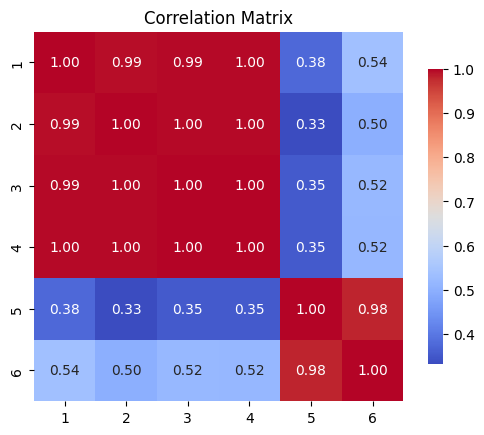

In [20]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


Explained variance by each principal component:
PC 1: 0.7636
PC 2: 0.2340
PC 3: 0.0010
PC 4: 0.0007
PC 5: 0.0006
PC 6: 0.0000


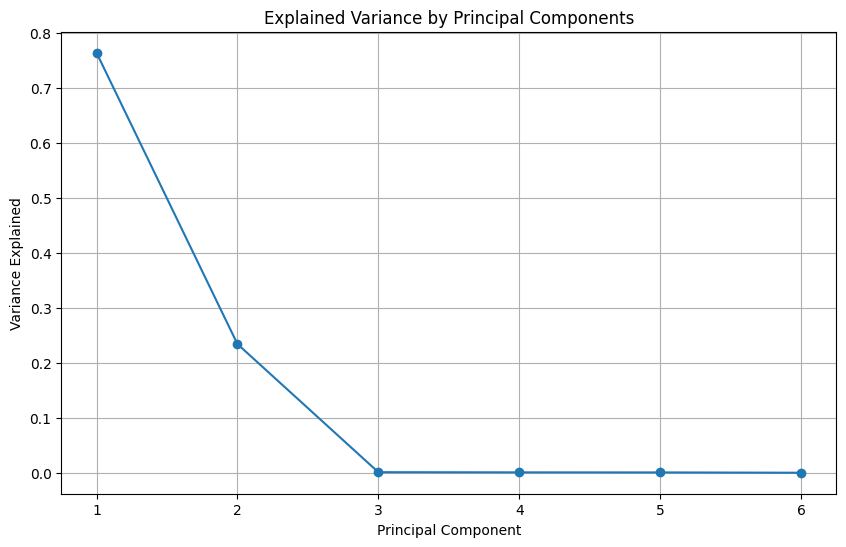

PCA Result:
        PC1       PC2
0  0.528874  0.082454
1  0.466810 -0.360349
2  0.771305 -0.046563
3  0.866600 -0.013626
4  0.723625 -0.061144


In [21]:
from sklearn.decomposition import PCA


# Assuming X is your standardized DataFrame
# Apply PCA
pca = PCA()
pca.fit(X)

# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Print explained variance
print("Explained variance by each principal component:")
for i, variance in enumerate(explained_variance):
    print(f"PC {i + 1}: {variance:.4f}")

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Choose number of components to keep based on explained variance (e.g., 95%)
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1  # 95% variance

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(X)

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i + 1}' for i in range(num_components)])

# Show the PCA DataFrame
print("PCA Result:")
print(pca_df.head())

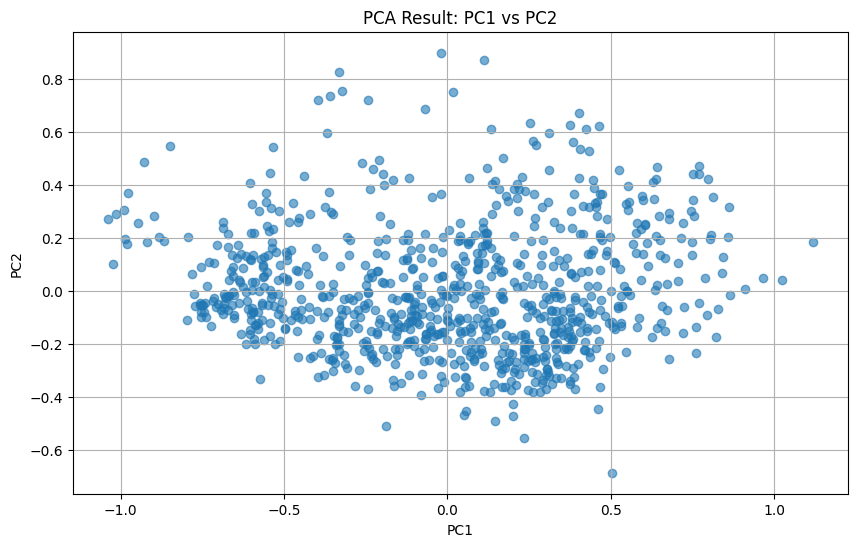

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
plt.title('PCA Result: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

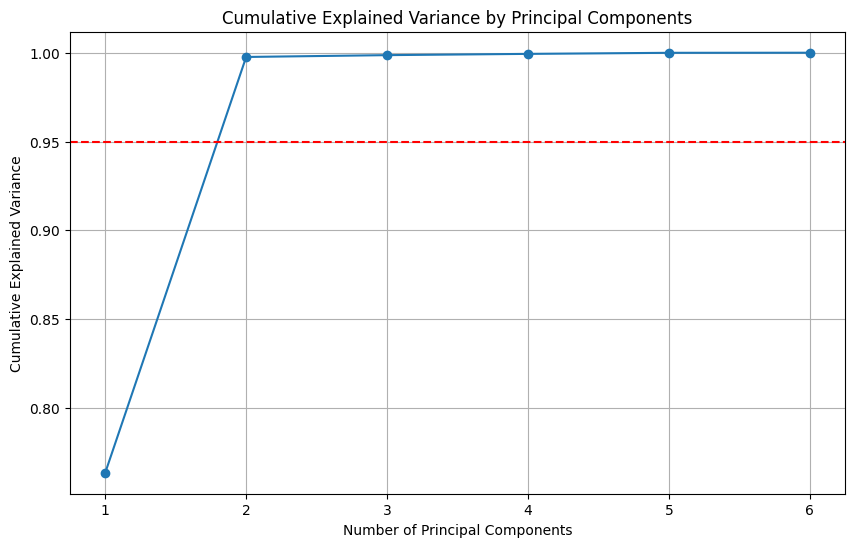

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% line
plt.grid()
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "Decision Tree": DecisionTreeRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")

Linear Regression - Mean Squared Error: 0.0005, R^2 Score: 0.9881
Random Forest - Mean Squared Error: 0.0006, R^2 Score: 0.9835
Support Vector Regressor - Mean Squared Error: 0.0023, R^2 Score: 0.9428
Decision Tree - Mean Squared Error: 0.0011, R^2 Score: 0.9714


In [26]:
lassocv = LassoCV(alphas = None,cv = 5, max_iter=2000000)
lassocv

LassoCV(cv=5, max_iter=2000000)

In [27]:
lassocv.fit(X_train,y_train)
lassocv.alpha_
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.9881331176376907

In [28]:
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10)
ridgecv.fit(X_train,y_train)
ridgecv.alpha_
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

0.988146501827992

In [29]:
elastic_cv = ElasticNetCV(alphas=None,cv = 5)
elastic_cv.fit(X_train,y_train)
elastic_cv.alpha_
elastic_cv.l1_ratio_
elastic = ElasticNet(alpha = elastic_cv.alpha_, l1_ratio= elastic_cv.l1_ratio_ )
elastic.fit(X_train,y_train)
elastic.score(X_test,y_test)

0.9881367544013235